In [1]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
from particles import resampling as rs
import time
import importlib
import sys
sys.path.append('..')

import GaussianMixture1DAlgorithms as algo
import utils as u
importlib.reload(algo)
importlib.reload(u)

<module 'utils' from '/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianMixture1D/../utils.py'>

In [2]:
w = 1/2
sigma = 1
weights = np.array([w, 1-w])

In [3]:
m = 6
d = 1
LSI = 1 + (np.exp(m**2)+1)/2
LSI

2155615773557599.0

In [4]:
def gm1d_density(xx, m, w):
    return w*norm.pdf(xx, loc = 0, scale = 1) + (1-w)*norm.pdf(xx, loc = m, scale = 1)

xx = np.linspace(-3, 10, 100)
yy = gm1d_density(xx, m, w)
dx = xx[1]-xx[0]

In [5]:
ms = np.array([np.zeros(d), m*np.ones(d)])
Sigmas = np.array([sigma*np.eye(d), sigma*np.eye(d)])

In [6]:
N = 100
X0 = np.random.multivariate_normal(np.zeros(d), np.eye(d), size = N)
Niter = 500
gamma = 0.01

In [7]:
### SMC-WFR
start = time.time()
wfr_x, wfr_w = algo.SMC_WFR(gamma, Niter, ms, Sigmas, weights, X0)
end = time.time()
end-start

1.1231589317321777

In [8]:
Niter_ula = Niter*3
Niter_mala = Niter
Niter_fr = Niter
Niter_smcula = Niter
Niter_smcmala = Niter

In [9]:
### ULA
start = time.time()
ula_chain = algo.ParallelULA(gamma, Niter_ula, ms, Sigmas, weights, X0)
end = time.time()
end-start

0.5521538257598877

In [10]:
### MALA
start = time.time()
mala_chain = algo.ParallelMALA(gamma, Niter_mala, ms, Sigmas, weights, X0)
end = time.time()
end-start

0.7509860992431641

In [11]:
### SMC-FR
start = time.time()
fr_x, fr_w = algo.SMC_UnitFR(gamma, Niter_fr, ms, Sigmas, weights, X0)
end = time.time()
end-start

0.43944716453552246

In [12]:
### SMC-ULA
start = time.time()
smcula_x, smcula_w = algo.SMC_ULA(gamma, Niter_smcula, ms, Sigmas, weights, X0)
end = time.time()
end-start

0.2610800266265869

In [13]:
### SMC-MALA
start = time.time()
smcmala_x, smcmala_w = algo.SMC_MALA(gamma, Niter_smcmala, ms, Sigmas, weights, X0)
end = time.time()
end-start

0.9372320175170898

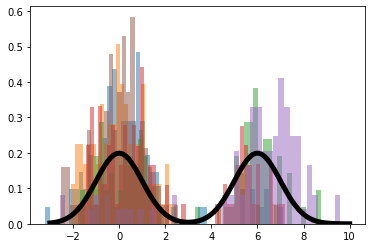

In [21]:
plt.hist(ula_chain[-1, :, :].flatten(), density = True, bins = 50, alpha = 0.5);
plt.hist(mala_chain[-1, :, :].flatten(), density = True, bins = 50, alpha = 0.5);
plt.hist(fr_x[-1, :, :].flatten(), density = True, weights = fr_w[-1, :], bins = 50, alpha = 0.5);
plt.hist(wfr_x[-1, :, :].flatten(), density = True, weights = wfr_w[-1, :], bins = 50, alpha = 0.5);
plt.hist(smcula_x[-1, :, :].flatten(), density = True, weights = smcula_w[-1, :], bins = 50, alpha = 0.5);
plt.hist(smcmala_x[-1, :, :].flatten(), density = True, weights = smcmala_w[-1, :], bins = 50, alpha = 0.5);
plt.plot(xx, yy, c = 'black', lw = 5)